1. Load the dataset bike_day_raw.csv, which has the regression target cnt. This dataset is hourly bike rentals in the citybike platform. The cnt column is the number of rentals, which we want to predict from date and weather data.

- Split the data into a training and a test set using train_test_split. 

- Use the LinearRegression class to learn a regression model on this data. 

- You can evaluate with the score method, which provides the R^2or using the mean_squared_error function from sklearn.metrics (Challenge: You can also write it yourself in numpy).


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv('bike_day_raw.csv')
df.head(5)

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [3]:
df.dropna(inplace=True)

X = df.drop(['cnt'], axis=1)
y = df['cnt']

In [ ]:
def r_test(X, y, w1, b):
    r2 = 1 - (((X*w1+b) - y)**2).sum() / ((y - y.mean())**2).sum()
    return r2

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = model.score(X_test, y_test)
mse, r2

(1796978.1114466994, 0.5518626278474863)

2. Load the diabetes dataset using sklearn.datasets.load_diabetes.
- Scale the dataset (you can be creative and make pipelines)
- Apply LinearRegression, 
- Apply Ridge and do grid search 
- Apply Lasso and do grid search
- Visualize the coefficients.


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

data = load_diabetes()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:

pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])
pipeline_lr.fit(X_train, y_train)
pipeline_lr.score(X_test, y_test)


0.45260276297191926

In [13]:
pipeline_ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])
params_ridge = {'ridge__alpha': np.logspace(-3, 3, 7)}
grid_ridge = GridSearchCV(pipeline_ridge, params_ridge, cv=5)
grid_ridge.fit(X_train, y_train)
grid_ridge.best_score_, grid_ridge.best_params_

(0.45393741579593494, {'ridge__alpha': 10.0})

In [14]:
pipeline_lasso = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso(max_iter=10000))
])
params_lasso = {'lasso__alpha': np.logspace(-3, 1, 5)}
grid_lasso = GridSearchCV(pipeline_lasso, params_lasso, cv=5)
grid_lasso.fit(X_train, y_train)
grid_lasso.best_score_, grid_lasso.best_params_

(0.4541347343880665, {'lasso__alpha': 1.0})

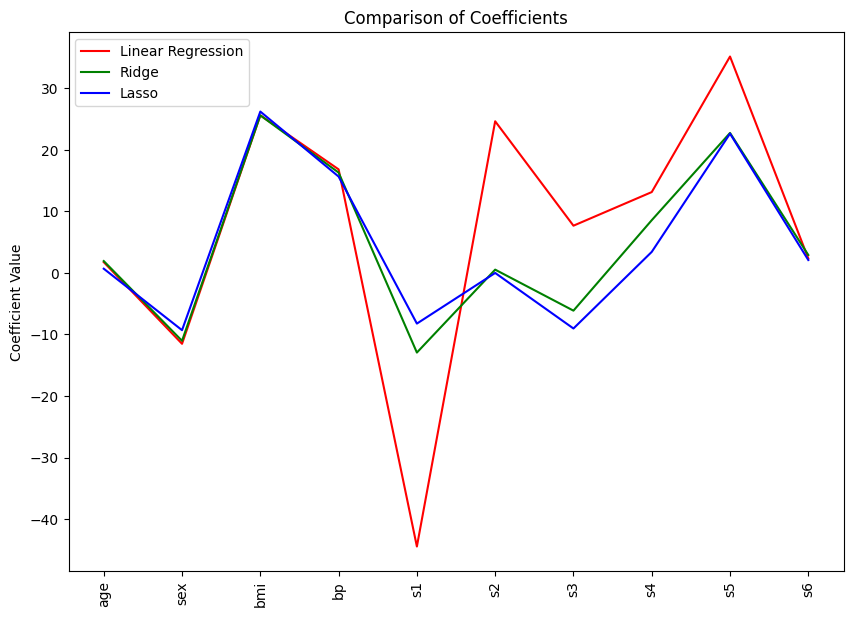

In [15]:
coefs = [
    pipeline_lr.named_steps['regressor'].coef_,
    grid_ridge.best_estimator_.named_steps['ridge'].coef_,
    grid_lasso.best_estimator_.named_steps['lasso'].coef_
]
plt.figure(figsize=(10, 7))
plt.plot(coefs[0], 'r', label='Linear Regression')
plt.plot(coefs[1], 'g', label='Ridge')
plt.plot(coefs[2], 'b', label='Lasso')
plt.xticks(np.arange(len(coefs[0])), data.feature_names, rotation=90)
plt.ylabel('Coefficient Value')
plt.title('Comparison of Coefficients')
plt.legend()
plt.show()